# In this project we are creating House Price Prediction Software

# Information about the columns of the data

1) **CRIM:**      per capita crime rate by town <br>
2) **ZN:**        proportion of residential land zoned for lots over 25,000 sq.ft. <br>
3) **INDUS:**     proportion of non-retail business acres per town <br>
4) **CHAS:**      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) <br>
5) **NOX:**       nitric oxides concentration (parts per 10 million) <br>
6) **RM:**        average number of rooms per dwelling <br>
7) **AGE:**       proportion of owner-occupied units built prior to 1940 <br>
8) **DIS:**       weighted distances to five Boston employment centres <br>
9) **RAD:**       index of accessibility to radial highways <br>
10) **TAX:**      full-value property-tax rate per 10,000 USD <br>
11) **PTRATIO:**  pupil-teacher ratio by town <br>
12) **B:**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
13) **LSTAT:**    % lower status of the population <br>
14) **MEDV:**     Median value of owner-occupied homes in 1000's USD <br>

In [4]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from joblib import dump, load

# Reading and Understanding Data

In [5]:
# Reading data from csv

housing = pd.read_csv("data.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


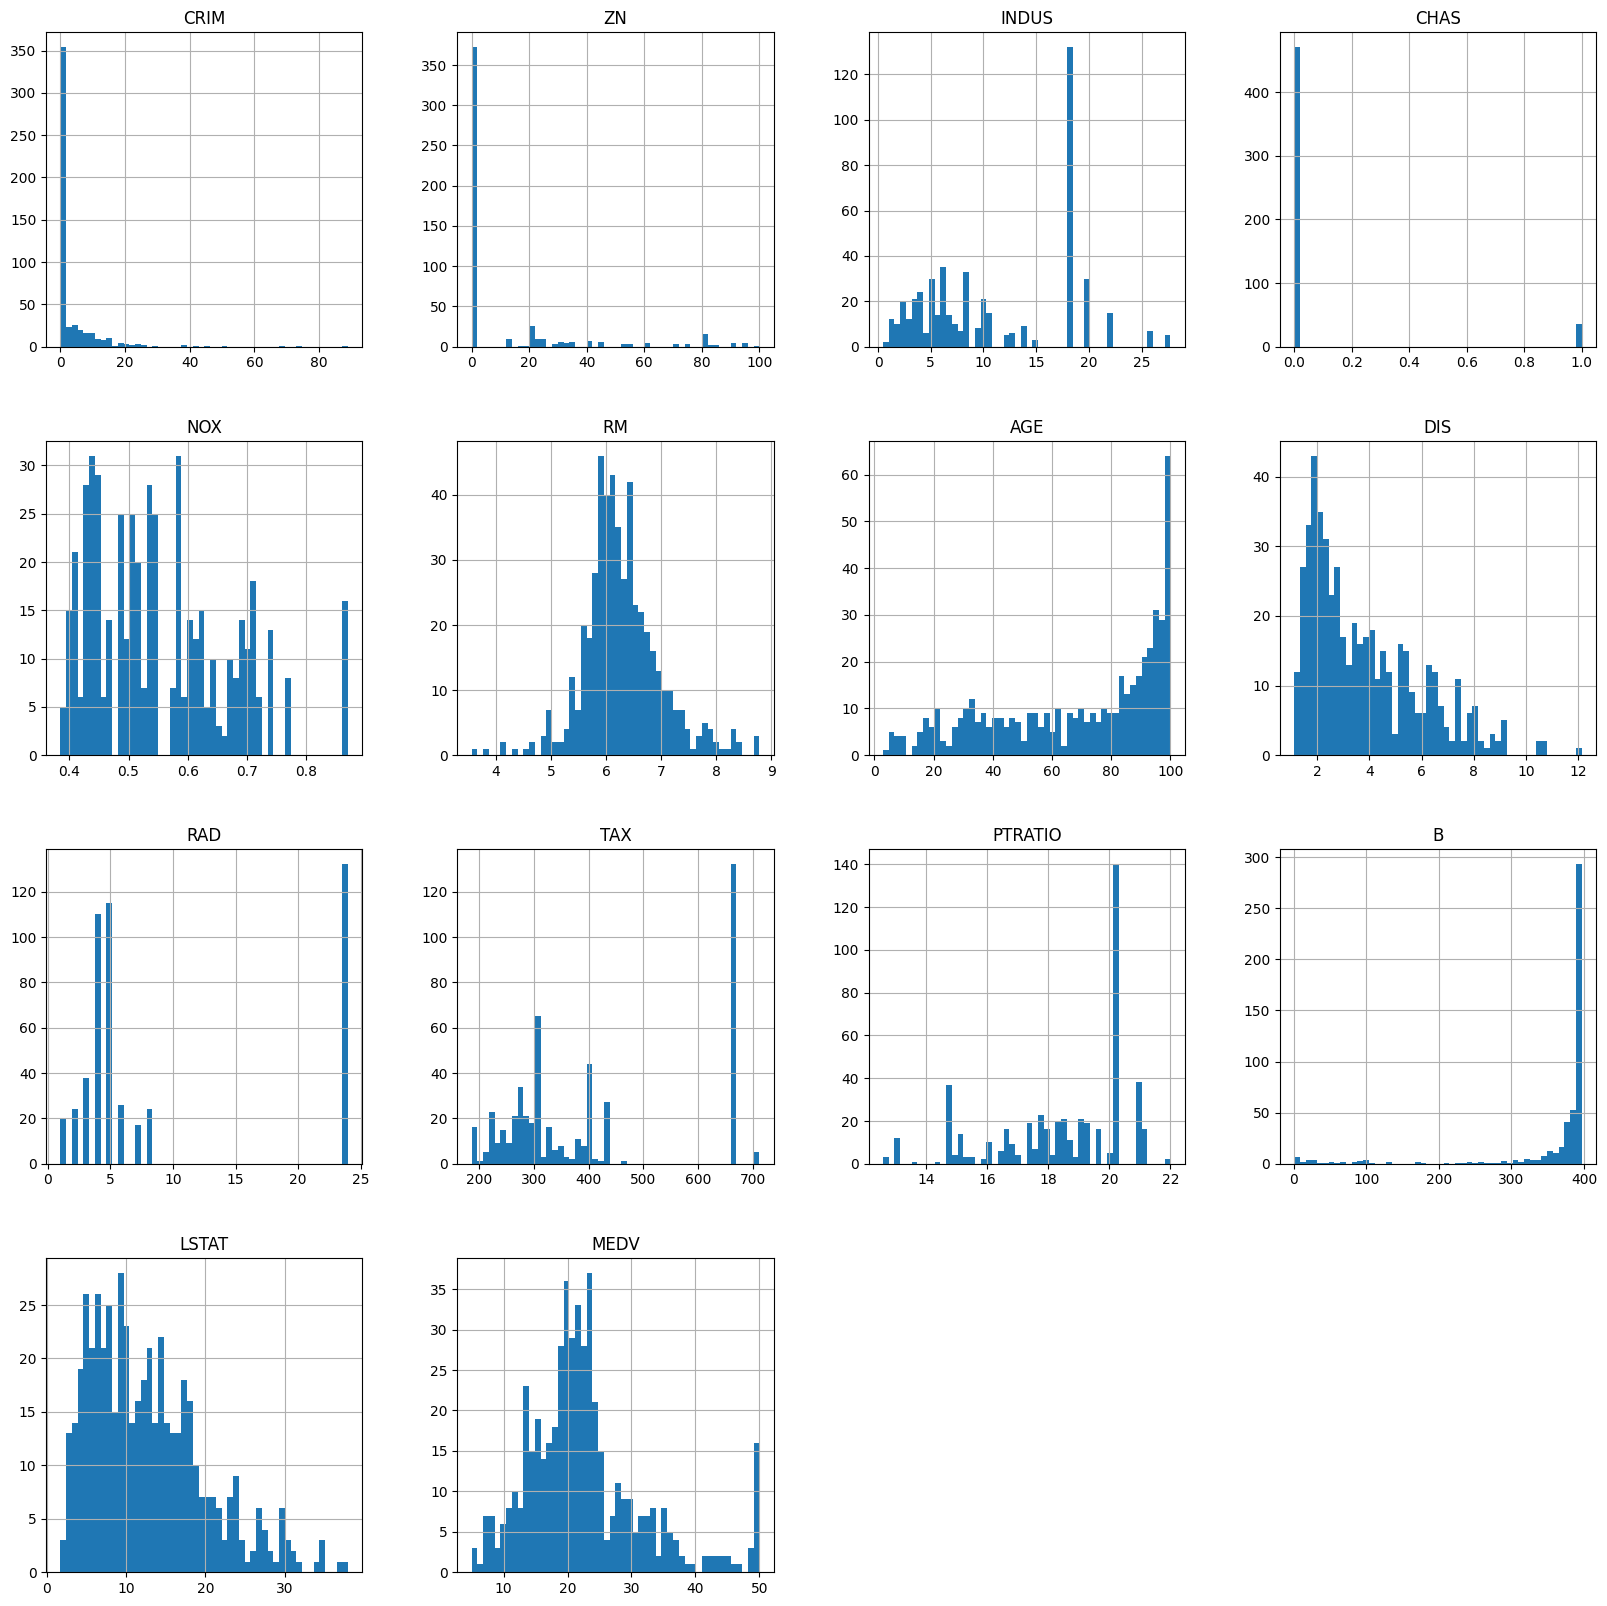

In [8]:
# Plotting the data

housing.hist(bins=50, figsize=(20,20))
plt.show()

# Splitting the data

In [9]:
# Doing the train test split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [10]:
train_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2


In [11]:
test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1


In [12]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["CHAS"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_train_set["CHAS"].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [14]:
strat_test_set["CHAS"].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [15]:
housing = strat_train_set.copy()

# Finding the Correlations

In [16]:
# Correlations

corr_matrix = housing.corr()

In [17]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

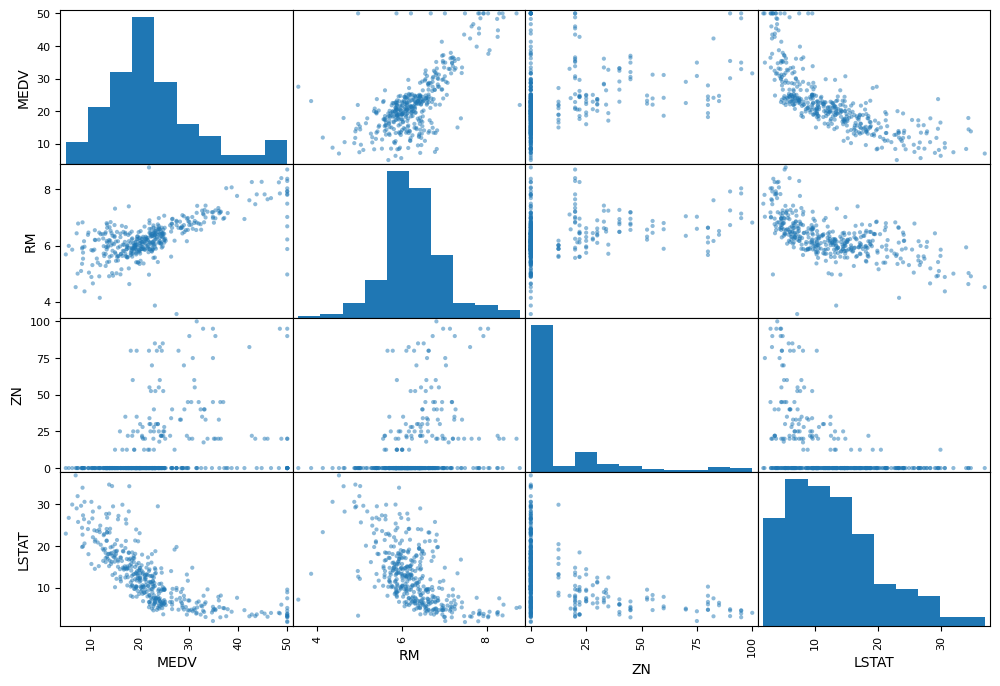

In [18]:
# Plotting the columns to understand Correlations

attributes = ["MEDV" , "RM" , "ZN" , "LSTAT"]
scatter_matrix(housing[attributes] , figsize=(12,8))

In [19]:
# Trying out attribute combinations

housing["TAXRM"] = housing["TAX"] / housing["RM"]
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [20]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

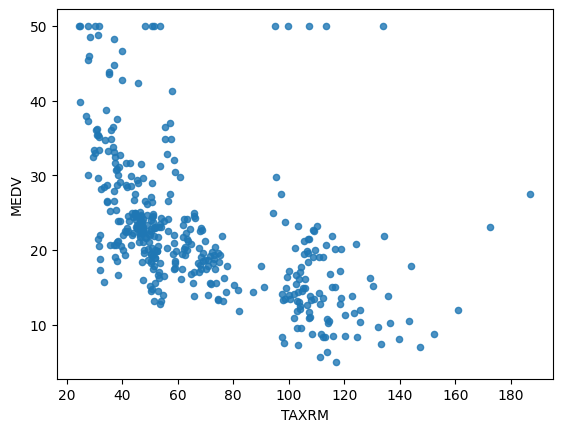

In [21]:
housing.plot(kind="scatter" , x="TAXRM" , y="MEDV" , alpha=0.8)

In [22]:
housing.shape

(404, 15)

In [23]:
housing.describe() # Before we started filling the missing values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.696004
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.577122
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.910026
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,54.831220
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.673976
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [24]:
# Splitting into features and labels

housing = strat_train_set.drop("MEDV" , axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [25]:
# Filling missing values attributes

imputer = SimpleImputer(strategy="median") # To fill the missing cells of columns with median values
imputer.fit(housing)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [26]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [27]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [28]:
housing_tr.describe() # After we fill the missing data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-Learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. <br>
It has a fit method and transform method. <br>
Fit method - Fits the dataset and calculates internal parameters<br><br>

2. Transformers - Transform method takes input and returns output based on the learnings from fit(). <br>
It also has a convenience function called fit_transform() which fits and then transforms.<br><br>

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. <br>
It also gives score() function which will evaluate the predictions.

# Feature Scaling

Primarily, two types of feature scaling methods

1. Min-max scaling (Normalization) <br>
    (value - min)/(max - min) <br>
    Sklearn provides a class called MinMaxScaler for this. <br>
    Answers will be between 0 and 1. <br><br>
    
2. Standardization <br>
    (value - mean)/std <br>
    Sklearn provides a class called StandardScaler for this.


# Creating a Pipeline

In [29]:
my_pipeline = Pipeline([
    ("imputer" , SimpleImputer(strategy="median")),
    ("std_scaler" , StandardScaler())
])

In [30]:
housing_num_tr = my_pipeline.fit_transform(housing) # Before Imputing of Data
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]], shape=(404, 13))

In [31]:
housing_num_tr.shape

(404, 13)

# Selecting a desired model for House Price Prediction

In [32]:
# 1) Use Linear Regression Model

model = LinearRegression()
model.fit(housing_num_tr , housing_labels)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
# Evaluating the model

housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE value is:", lin_rmse) # RSME value is too large

RMSE value is: 4.835301058716238


In [34]:
# Using better evaluation technique - Cross Validation

scores = cross_val_score(model , housing_num_tr , housing_labels , scoring="neg_mean_squared_error" , cv=10) # 10 is for 10 folds
rmse_scores = np.sqrt(-scores)
rmse_scores

array([4.22235612, 4.26438649, 5.09424333, 3.83081183, 5.37600331,
       4.41092152, 7.47272243, 5.48554135, 4.14606627, 6.0717752 ])

In [35]:
# Printing the Score, Mean Score, Standard Deviation of RMSE

def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())
    
print_scores(rmse_scores)

Scores: [4.22235612 4.26438649 5.09424333 3.83081183 5.37600331 4.41092152
 7.47272243 5.48554135 4.14606627 6.0717752 ]
Mean: 5.037482786117751
Standard Deviation: 1.059438240560695


In [36]:
# 2) Use Decision Tree Regression Model

model = DecisionTreeRegressor()
model.fit(housing_num_tr , housing_labels)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [37]:
# Again evaluating the model

housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
print("RMSE value is:", rmse) # RSME value is zero means model is overfit

RMSE value is: 0.0


In [38]:
# Using better evaluation technique - Cross Validation

scores = cross_val_score(model , housing_num_tr , housing_labels , scoring="neg_mean_squared_error" , cv=10) # 10 is for 10 folds
rmse_scores = np.sqrt(-scores)
rmse_scores

array([3.67237545, 5.5832939 , 5.00831017, 3.98558378, 4.0692444 ,
       3.35525707, 6.52947165, 3.87981958, 3.46070802, 4.90020408])

In [39]:
# Printing the Score, Mean Score, Standard Deviation of RMSE

def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())
    
print_scores(rmse_scores)

Scores: [3.67237545 5.5832939  5.00831017 3.98558378 4.0692444  3.35525707
 6.52947165 3.87981958 3.46070802 4.90020408]
Mean: 4.444426809303224
Standard Deviation: 0.9792989504271591


In [40]:
# 3) Use Random Forest Regression Model

model = RandomForestRegressor()
model.fit(housing_num_tr , housing_labels)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
# Again evaluating the model

housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
print("RMSE value is:", rmse)

RMSE value is: 1.1894006634094374


In [42]:
# Using better evaluation technique - Cross Validation

scores = cross_val_score(model , housing_num_tr , housing_labels , scoring="neg_mean_squared_error" , cv=10) # 10 is for 10 folds
rmse_scores = np.sqrt(-scores)
rmse_scores

array([2.84149509, 2.9096581 , 4.32273513, 2.71892133, 3.47048864,
       2.6644305 , 5.17789422, 3.31120009, 3.07098138, 3.42347335])

In [43]:
# Printing the Score, Mean Score, Standard Deviation of RMSE

def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())
    
print_scores(rmse_scores)

Scores: [2.84149509 2.9096581  4.32273513 2.71892133 3.47048864 2.6644305
 5.17789422 3.31120009 3.07098138 3.42347335]
Mean: 3.391127784024929
Standard Deviation: 0.7543548703375453


### Note: Comparing the RMSE values of Linear Regressor Model, Decision Tree Model and Random Forest Regressor we find that Random Forest Regressor model has less RSME value and it will be perfect as our model

# Saving the model

In [44]:
dump(model, "HousePricePrediction.joblib")

['HousePricePrediction.joblib']

# Testing the model

In [45]:
X_test = strat_test_set.drop("MEDV" , axis=1)
y_test = strat_test_set["MEDV"].copy()

X_test_prepared = my_pipeline.transform(X_test)

final_predictions = model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test , final_predictions)
final_rmse = np.sqrt(final_mse)

print("RSME value is:" , final_rmse)

RSME value is: 2.9440482849168013


# Using the model for prediction

In [46]:
model = load("HousePricePrediction.joblib")
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([24.218])